In [1]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats
import scripts.get_namelist as nml

def visualize_all(reader, step, plane, savename=''):
    reader.step = step
    fs = 12
    plist = ('u','v','w','rho','T','p')
    primitives = reader.readData(plist)
    colormap = ['inferno','afmhot','viridis','viridis','inferno','afmhot']
    
    fig, axarr = plt.subplots(2,3, figsize=(10,6), dpi=100) 
    counter = 0
    for irow in range(0,2):
        for icol in range(0,3):
            if plane=='xy': data2plot = np.transpose(primitives[counter][:,:,0])
            if plane=='xz': data2plot = np.transpose(primitives[counter][:,0,:])
            im = axarr[irow,icol].imshow( data2plot, 
                            cmap=colormap[counter], origin='lower', interpolation='none')#, aspect=1.)
            axarr[irow,icol].set_title(plist[counter], fontsize=fs, loc='center')
            axarr[irow,icol].set_xticks([])
            axarr[irow,icol].set_yticks([]) 
            if plane=='xy': plt.subplots_adjust(wspace=0.5,hspace=0.1)
            if plane=='xz': plt.subplots_adjust(wspace=0.3,hspace=0.1)

            # set the colorbar
            divider1 = make_axes_locatable(axarr[irow,icol])
            cax = divider1.append_axes('right', size='5%', pad=0.1)
            maxval = np.amax(primitives[counter]);
            minval = np.amin(primitives[counter]);
            cbar = plt.colorbar(im, cax,ticks=[minval, maxval])
            cbar.ax.set_yticklabels(['%0.2f'%(minval), '%0.2f'%(maxval)]) 
            cbar.ax.tick_params(labelsize=0.75*fs)
            counter += 1
    
    # set the overall title and save
    fig.suptitle('Time: {}'.format(reader.time),size=fs,y=1)
    if savename:
        plt.savefig(savename, dpi=500)#, bbox_inches='tight',pan_inches=0.5)
        plt.close(fig)
        print "Saved plot to ",savename
    

In [8]:
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/256x512x128/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/512x724x256/'
directory = '/lus/theta-fs0/projects/HighMachTurbulence/ShearLayerData/temporal/Mc04/rr1/1024x1448x512'

filename_prefix = directory+'/shearlayer_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(True,False,True))
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory)

steps = sorted(reader.steps)

print("Steps: {}".format(steps))

Params for this run:
	Mc = 0.4
	Re = 1000.0
	rr = 1.0
Steps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


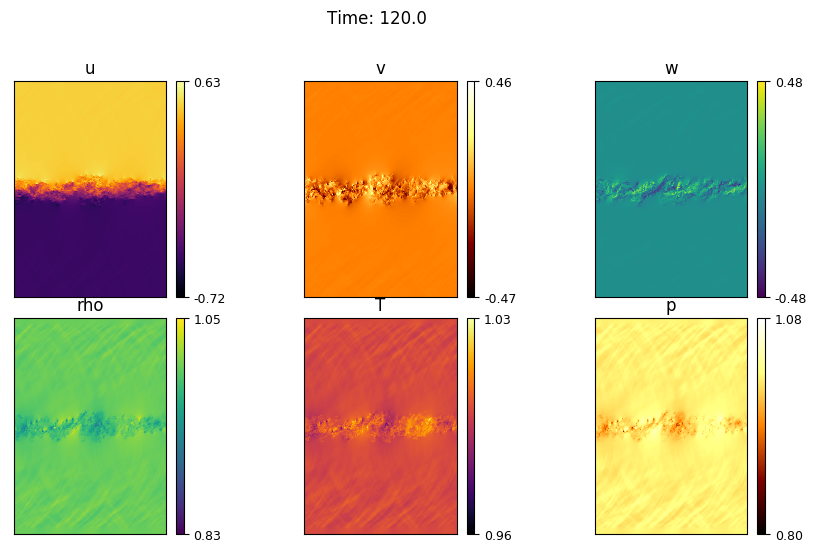

In [9]:
# plot a streamwise xy slice
zslice = int(Nz/2)
reader.sub_domain = (0,0,zslice), (reader.domain_size[0]-1, reader.domain_size[1]-1, zslice)
step = max(steps)
visualize_all(reader, step, plane='xy',savename="")

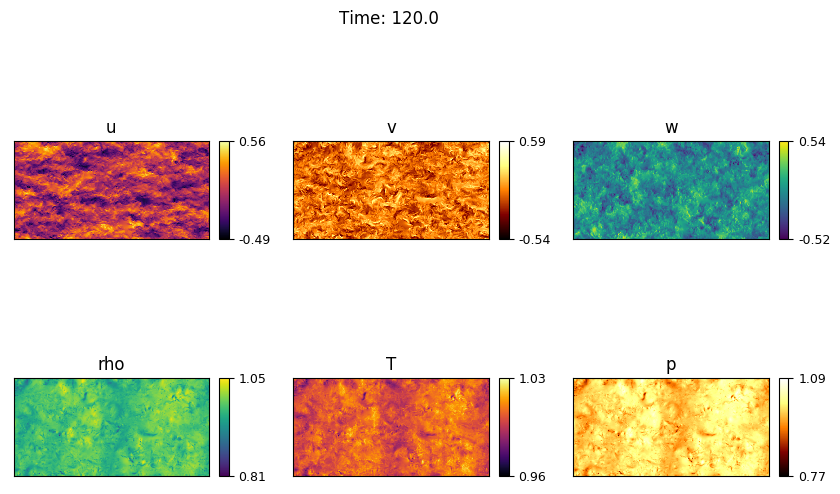

In [10]:
# plot an spanwise xz slice
yslice = Ny/2
reader.sub_domain = (0,yslice,0), (reader.domain_size[0]-1, yslice, reader.domain_size[2]-1)
step = max(steps)
visualize_all(reader, step, plane='xz',savename="")

(128, 384)

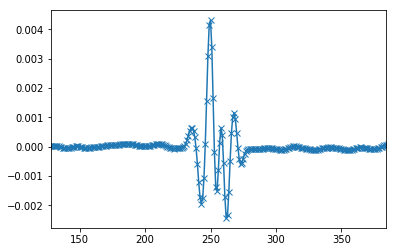

In [138]:
q = reader.readData('w')
q = np.squeeze(np.array(q))
plt.plot(q[0,:],'-x')
plt.xlim([Ny/4,3*Ny/4])

In [11]:
# plot all
for step in steps[0::]:
    savename = directory+"/img/slice_xy_%04d.png"%step
    visualize_all(reader, step=step, plane='xy',savename=savename)
    #savename = directory+"../img/slice_xz_%04d.png"%step
    #visualize_all(reader, step=step, plane='xz',savename=savename)

Saved plot to  /lus/theta-fs0/projects/HighMachTurbulence/ShearLayerData/temporal/Mc04/rr1/1024x1448x512/img/slice_xy_0000.png
Saved plot to  /lus/theta-fs0/projects/HighMachTurbulence/ShearLayerData/temporal/Mc04/rr1/1024x1448x512/img/slice_xy_0001.png
Saved plot to  /lus/theta-fs0/projects/HighMachTurbulence/ShearLayerData/temporal/Mc04/rr1/1024x1448x512/img/slice_xy_0002.png
Saved plot to  /lus/theta-fs0/projects/HighMachTurbulence/ShearLayerData/temporal/Mc04/rr1/1024x1448x512/img/slice_xy_0003.png
Saved plot to  /lus/theta-fs0/projects/HighMachTurbulence/ShearLayerData/temporal/Mc04/rr1/1024x1448x512/img/slice_xy_0004.png
Saved plot to  /lus/theta-fs0/projects/HighMachTurbulence/ShearLayerData/temporal/Mc04/rr1/1024x1448x512/img/slice_xy_0005.png
Saved plot to  /lus/theta-fs0/projects/HighMachTurbulence/ShearLayerData/temporal/Mc04/rr1/1024x1448x512/img/slice_xy_0006.png
Saved plot to  /lus/theta-fs0/projects/HighMachTurbulence/ShearLayerData/temporal/Mc04/rr1/1024x1448x512/img/sl